In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import StratifiedKFold,KFold,cross_validate
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split
import scipy.stats
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix,classification_report,roc_curve
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict,cross_val_score,GridSearchCV,train_test_split
import warnings
warnings.simplefilter(action='ignore')
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv('DS2_C6_S2_CarSales_Data_Challenge.csv')

In [3]:
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [5]:
num=list(df.select_dtypes(include=['float64','int64']).columns)
num

['Sales_in_thousands',
 '__year_resale_value',
 'Price_in_thousands',
 'Engine_size',
 'Horsepower',
 'Wheelbase',
 'Width',
 'Length',
 'Curb_weight',
 'Fuel_capacity',
 'Fuel_efficiency',
 'Power_perf_factor']

In [6]:
df2=df.copy()
df=df[num]
df2=df2.dropna()

In [7]:
df.dropna()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
5,18.780,23.555,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105
...,...,...,...,...,...,...,...,...,...,...,...,...
145,9.761,11.425,14.90,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,46.943877
146,83.721,13.240,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,47.638237
147,51.102,16.725,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,61.701381
148,9.569,16.575,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,48.907372


In [8]:
df.iloc[:,0:]=StandardScaler().fit_transform(df.iloc[:,0:])

In [9]:
df

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,-0.532042,-0.150182,-0.411789,-1.210889,-0.812988,-0.825439,-1.118929,-1.116140,-1.175923,-1.226164,0.973544,-0.748698
1,-0.200761,0.157990,0.070551,0.133586,0.690949,0.080457,-0.247036,0.415009,0.221133,-0.194023,0.270767,0.571683
2,-0.573406,0.013329,NaN,0.133586,0.690949,-0.077090,-0.159847,0.347788,0.146347,-0.194023,0.505026,NaN
3,-0.654896,1.021574,1.021248,0.421687,0.425549,0.933837,0.072658,0.691363,0.750996,0.012406,-0.432010,0.572441
4,-0.480754,0.366653,-0.237727,-1.210889,-0.636055,-0.641634,-0.857361,-0.697875,-0.604689,-0.400451,0.739285,-0.569239
...,...,...,...,...,...,...,...,...,...,...,...,...
152,-0.729263,NaN,-0.209066,-1.114855,-0.459121,-0.917341,-1.031740,-0.802441,-0.534677,-0.555272,0.270767,-0.420757
153,-0.556728,NaN,0.007637,-0.634685,-0.317574,-0.339669,-0.537667,-0.107822,-0.270542,-0.013398,0.270767,-0.254937
154,-0.523017,NaN,0.098512,-0.634685,-0.317574,-0.339669,-0.537667,-0.085415,-0.189391,-0.013398,0.270767,-0.234927
155,-0.730030,NaN,1.265913,-0.730719,0.885577,-0.339669,0.101721,-0.122760,0.354792,0.141423,-0.197751,0.980781


In [10]:
df=df.dropna()

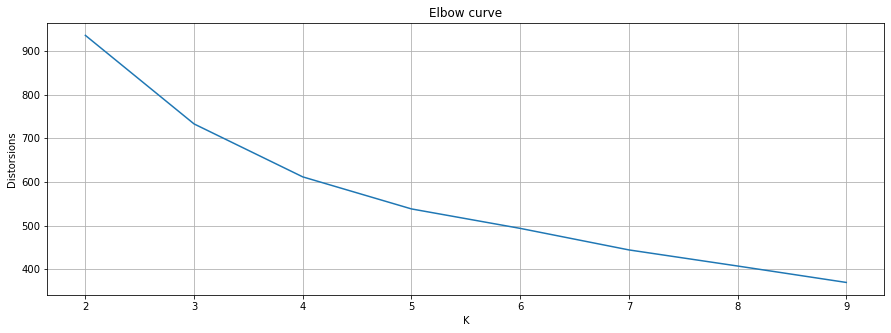

In [11]:
distorsions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve');

For n_clusters = 2 The average silhouette_score is : 0.3157635251242117
For n_clusters = 3 The average silhouette_score is : 0.3227429470090959
For n_clusters = 4 The average silhouette_score is : 0.2965619095970964
For n_clusters = 5 The average silhouette_score is : 0.20899429790945176
For n_clusters = 6 The average silhouette_score is : 0.20858658947264144


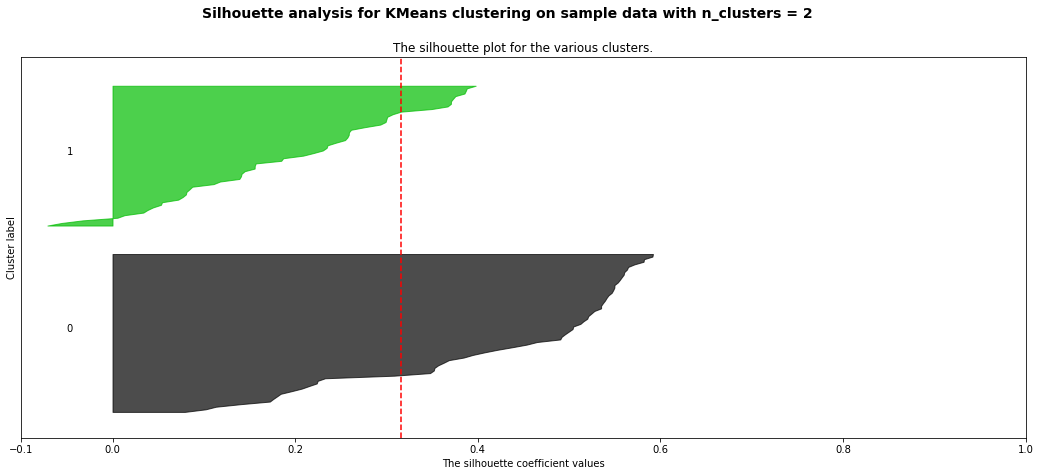

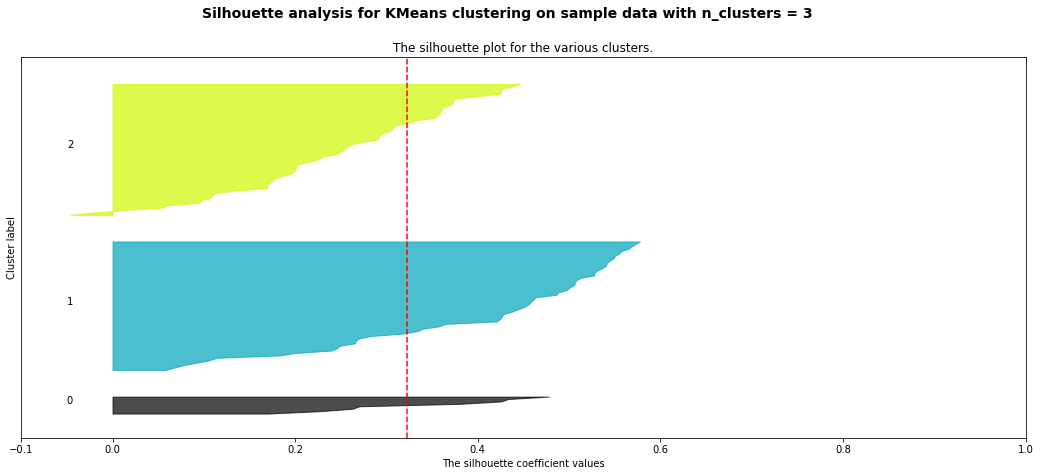

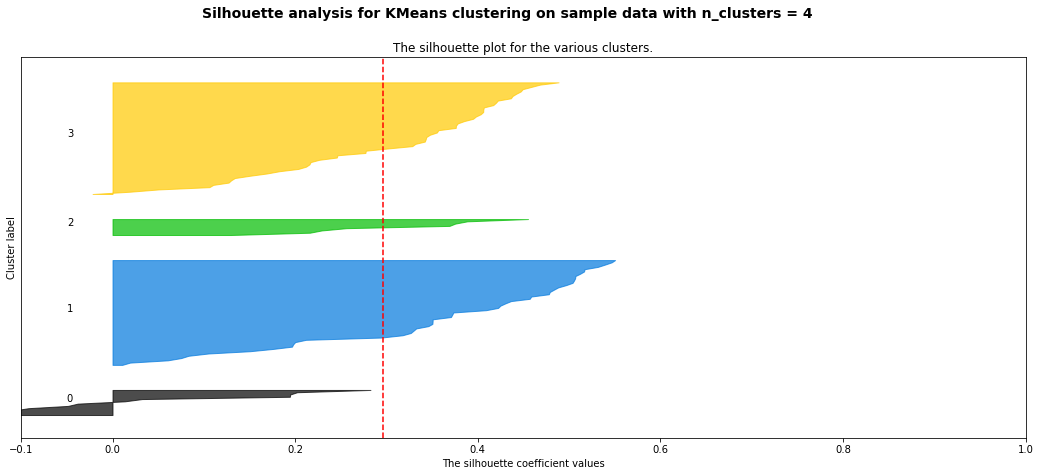

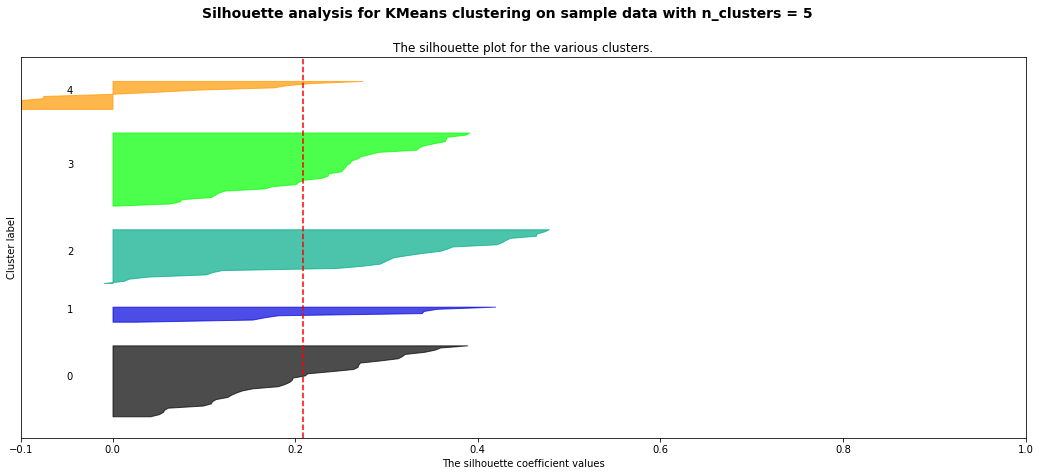

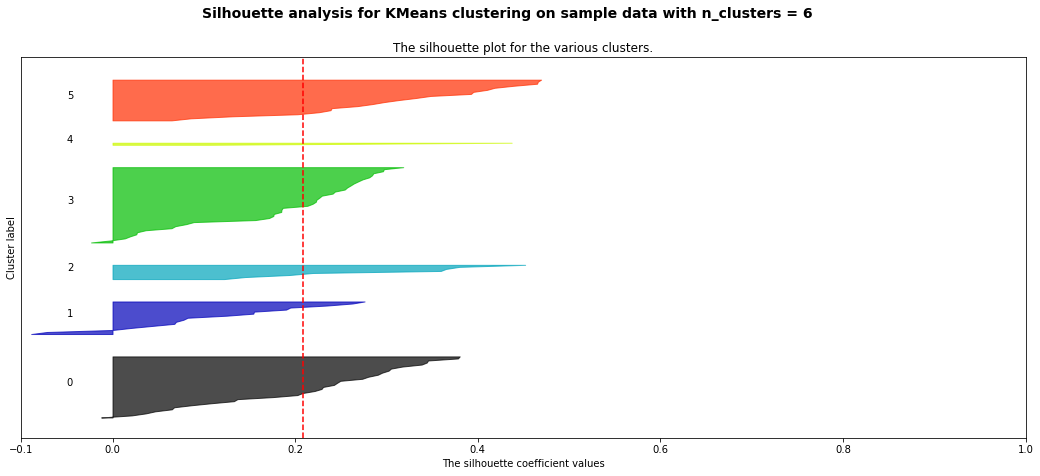

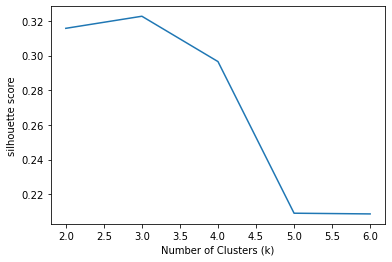

In [12]:
range_n_clusters = [2, 3, 4, 5, 6]
silhouette_avg_n_clusters = []
for n_clusters in range_n_clusters:
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])

    ax1.set_ylim([0, len(df.iloc[:,1:]) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(df)

    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)

    sample_silhouette_values = silhouette_samples(df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):

        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)


        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))


        y_lower = y_upper + 10 

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")


    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

   
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()



plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()

In [13]:
km=KMeans(n_clusters=3)

In [14]:
km.fit(df)

KMeans(n_clusters=3)

In [15]:
cl=km.predict(df)
cl

array([0, 1, 1, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 2, 2, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0])

In [16]:
df2['Cluster']=cl
df2

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Cluster
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,0
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778,1
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779,1
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639,0
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Volkswagen,Golf,9.761,11.425,Passenger,14.90,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,1/24/2011,46.943877,0
146,Volkswagen,Jetta,83.721,13.240,Passenger,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,8/27/2011,47.638237,0
147,Volkswagen,Passat,51.102,16.725,Passenger,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,10/30/2012,61.701381,0
148,Volkswagen,Cabrio,9.569,16.575,Passenger,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,5/31/2011,48.907372,0


In [21]:
logmodel=LogisticRegression()

In [22]:
df['Cluster']=cl

In [23]:
X=df.drop('Cluster',axis=1)
y=df['Cluster']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=88)

In [26]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [28]:
y_pred=logmodel.predict(X_test)

In [29]:
accuracy_score(y_test,y_pred)

1.0

In [31]:
logmodel.coef_

array([[ 0.04868808, -0.51368891, -0.50358993, -0.81042063, -0.63960811,
        -0.0285926 , -0.82100415, -0.32178089, -0.96437905, -0.95535006,
         0.7725231 , -0.62984255],
       [ 0.1041481 , -0.5170774 , -0.45067067,  0.45292535,  0.15465903,
         0.27506834,  0.48746422,  0.60803898,  0.53353461,  0.29904385,
        -0.30572458,  0.02902945],
       [-0.15283618,  1.03076631,  0.9542606 ,  0.35749528,  0.48494908,
        -0.24647573,  0.33353993, -0.28625809,  0.43084445,  0.65630621,
        -0.46679853,  0.60081309]])

In [38]:
df.head()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Cluster
0,-0.532042,-0.150182,-0.411789,-1.210889,-0.812988,-0.825439,-1.118929,-1.116140,-1.175923,-1.226164,0.973544,-0.748698,0
1,-0.200761,0.157990,0.070551,0.133586,0.690949,0.080457,-0.247036,0.415009,0.221133,-0.194023,0.270767,0.571683,1
3,-0.654896,1.021574,1.021248,0.421687,0.425549,0.933837,0.072658,0.691363,0.750996,0.012406,-0.432010,0.572441,1
4,-0.480754,0.366653,-0.237727,-1.210889,-0.636055,-0.641634,-0.857361,-0.697875,-0.604689,-0.400451,0.739285,-0.569239,0
5,-0.504599,0.480628,0.458519,-0.250550,0.248615,0.159230,1.438623,0.347788,0.291145,0.141423,-0.432010,0.300123,1


In [36]:
df.corr()['Cluster']

Sales_in_thousands    -0.084832
__year_resale_value    0.711977
Price_in_thousands     0.782416
Engine_size            0.748855
Horsepower             0.798748
Wheelbase              0.327785
Width                  0.565804
Length                 0.431142
Curb_weight            0.677607
Fuel_capacity          0.624467
Fuel_efficiency       -0.602938
Power_perf_factor      0.815991
Cluster                1.000000
Name: Cluster, dtype: float64